# Group Project 22

*Group Members: Angelique Clara Hanzell, Jack Parkinson, Edward Liang, Vamsi Nadella*

# Determining if Fatal US Police Shooting Decisions are Racially Motivated for African Americans

## Question

Does race and threat level determine the severity of force used by US Law Enforcement?

## Introduction

Police use of deadly force is an ongoing controversial topic that has a recurring theme of racial bias. Many reports have highlighted a racial disparity in police shootings, including a report by Yale University that found  that Black Americans from  2015-2020  were killed by police 2.6 times more than white people (Belli, 2021). These studies did not factor in threat level. Therefore this begs the question, can the disproportionate killing of black Americans be explained through a higher rate of threat level of police shooting victims?

In our project, we will use the US Police Shootings dataset that is attained through GitHub. This dataset gives us insight into every fatal shooting that has happened in the United States by a police officer. Our group is interested in the relationship between police shootings ( `manner_of_death`) in relation to race (`race`) and level of threat, (`threat_level`). Analyzing these categories may give us insights into how race and level of threat could be associated with the manner of death of the person. Column names used for data analysis with their descriptions: 

    
- `manner_of_death`: `shot` and `shot and Tasered`
- `race`:
    - `W`: White
    - `B`: Black
- `threat_level`: 
    - `attack`: direct and immediate threat to life including armed or attacking police officers
    - `other`: all remaining cases


## Preliminary Results

In [1]:
library(tidyverse)
library(infer)
library(cowplot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
# Reading the data from the web
ShootingData <- read.csv('https://github.com/washingtonpost/data-police-shootings/releases/download/v0.1/fatal-police-shootings-data.csv')

head(ShootingData)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,3,Tim Elliot,2015-01-02,shot,gun,53,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
2,4,Lewis Lee Lembke,2015-01-02,shot,gun,47,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
3,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
4,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
5,9,Michael Rodriguez,2015-01-04,shot,nail gun,39,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True
6,11,Kenneth Joe Brown,2015-01-04,shot,gun,18,M,W,Guthrie,OK,False,attack,Not fleeing,False,-97.423,35.877,True


In [3]:
# Filtering the data for parameters of interest
ShootingPop <- ShootingData %>%
    filter(race %in% c('W', 'B'),
          threat_level != 'undetermined') %>% 
    select(manner_of_death, race, threat_level)

head(ShootingPop)

,manner_of_death,race,threat_level
,<chr>,<chr>,<chr>
1,shot,W,attack
2,shot,W,attack
3,shot,W,attack
4,shot,W,attack
5,shot,W,other
6,shot,B,attack


`summarise()` has grouped output by 'race'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'race'. You can override using the
`.groups` argument.


race,threat_level,p
<chr>,<chr>,<dbl>
B,attack,0.9612961
B,other,0.9171717
W,attack,0.9641473
W,other,0.9286432


race,threat_level,p
<chr>,<chr>,<dbl>
B,attack,0.03870387
B,other,0.08282828
W,attack,0.03585271
W,other,0.07135678


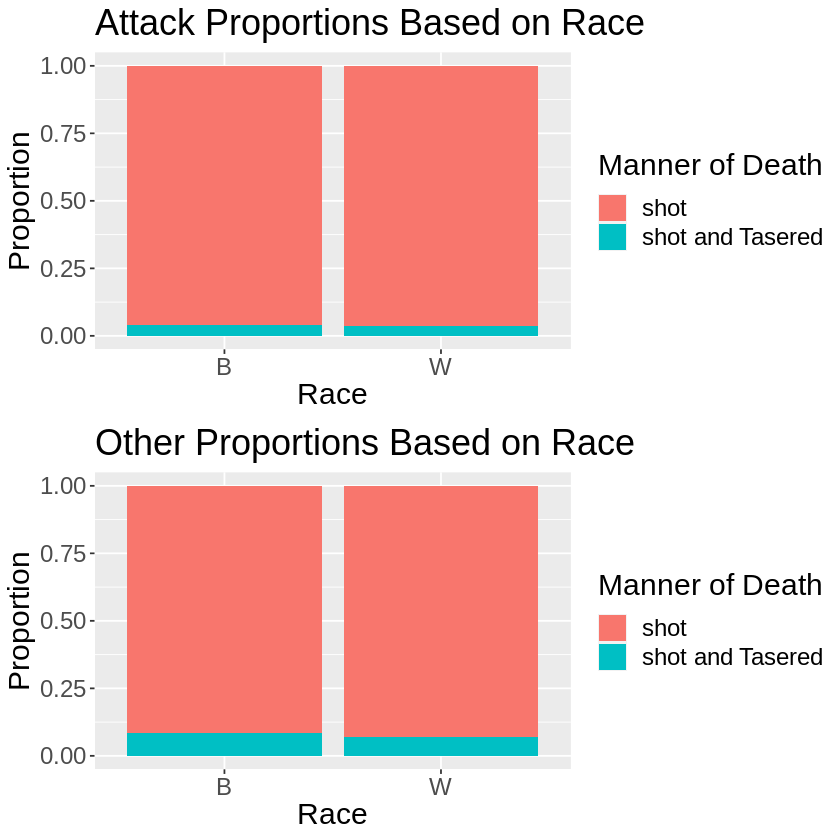

In [4]:
# Displaying a graph for visualization and tables associated with proportions

ShotOnlyProps <- ShootingPop %>% 
    group_by(race, threat_level) %>% 
    summarise(p = sum(manner_of_death == 'shot')/n())

ShotAndTasedProps <- ShootingPop %>% 
    group_by(race, threat_level) %>% 
    summarise(p = sum(manner_of_death == 'shot and Tasered')/n())

PlottingAttack <- ShootingPop %>%
    filter(threat_level == 'attack') %>% 
    group_by(race) %>% 
    ggplot(aes(x = race, fill = manner_of_death)) +
    labs(x = 'Race', fill = 'Manner of Death', y = 'Proportion') +
    geom_bar(position = "fill") +
    ggtitle("Attack Proportions Based on Race") +
    theme(text = element_text(size = 18))

PlottingOther <- ShootingPop %>% 
    filter(threat_level == 'other') %>% 
    group_by(race) %>% 
    ggplot(aes(x = race, fill = manner_of_death)) +
    labs(x = 'Race', fill = 'Manner of Death', y = 'Proportion') +
    geom_bar(position = "fill") +
    ggtitle("Other Proportions Based on Race") +
    theme(text = element_text(size = 18))

ShotOnlyProps
ShotAndTasedProps
plot_grid(PlottingAttack, PlottingOther, nrow = 2)

## Methods: Plan

Using our knowledge of inferential methods we are able to get an early sense of what the proportions look like for fatal police shooting decisions in relation to race and sense of threat. With both a table showing the numerical proportions and a bar graph providing an effective visualization, we can easily begin to make some interpretations about what the population data may look like. 

Since we are not certain whether or not the data may present some kind of bias (whether it be representing some US states more than others or mistakenly leaving out certain observations), we cannot fully rely only on the dataset to make an accurate estimation about the population. 

### Hypothesis Testing

$p_1$ and $p_2$ represent the proportion for black people and white people that were shot deemed 'other' respectively

- $H_0: p_1 - p_2 = 0$ 

- $H_A: p_1 - p_2 \neq 0$

By doing a hypothesis test, we will be able to see if the difference in proportions will be significant enough to reject the null hypothesis.

### Confidence Interval

We will obtain a confidence interval using bootstrapping to find a plausible range of values for our population proportions.

### Scaled Parameter:

We will estimate the population standard deviation using bootstrapping to generate a confidence interval to find a suitable range of values. The sd can provide a useful metric for how well our results generalize to the population

### Expectations

We expect to find some racial motivation behind the police shootings. Our findings will see if there is still evident racial discrimination present in the United States between law enforcement and African Americans.

### Future Questions
- How can we change society to make everyone more equal?
- Is racism actually at an all-time low today in American history?
- Are we doing enough as a society to see a declining trend in racial discrimination?

## References


### 1.
Belli, B. (2021, April 12). Racial  Racial disparity in police shootings unchanged over 5 years. Yale News. Retrieved July 25, 2022, from https://news.yale.edu/2020/10/27/racial-disparity-police-shootings-unchanged-over-5-years 

### 2.
Cesario, J., Johnson, D. J., & Terrill, W. (2019). Is There Evidence of Racial Disparity in Police Use of Deadly Force? Analyses of Officer-Involved Fatal Shootings in 2015–2016. Social Psychological and Personality Science, 10(5), 586–595. https://doi.org/10.1177/1948550618775108


### 3.
Williams, H. E., Reinhard, D., & Oriola, T. B. (2021). Fatal officer involved shootings following the use of TASER conducted energy weapons. The Police Journal. https://doi.org/10.1177/0032258X211030322




### Dataset
https://github.com/washingtonpost/data-police-shootings/releases/download/v0.1/fatal-police-shootings-data.csv